In [3]:
import os
import pandas as pd
import time
import numpy as np

# Visualize
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

# Unsupervised Learning
import matplotlib.cm as cm
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
folder = os.getcwd()

In [5]:
os.listdir(folder)

['EDA_MusixMatch.ipynb',
 'mxm_dataset_train.txt',
 'mxm_dataset_test.txt',
 'mxm_779k_matches.txt',
 '.ipynb_checkpoints',
 'how_many_inputs.py']

In [ ]:
# Examine what dataset looks like
file1 = open('mxm_dataset_train.txt', 'r')
Lines = file1.readlines()
 
count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print("Line{}: {}".format(count, line.strip()))

Indexed from '1'
- Lines 1-17: Comments 
- Line 18: Word  Dictionary of 5000 top words
- Line 19-End: Track Info

#### Create Word List of Top 5000 Words 

In [10]:
# Create Word List 
file1 = open('mxm_dataset_train.txt', 'r')
Lines = file1.readlines()

count = 0
for line in Lines:
    if count == 17:
        word_list = line.strip(" ").strip("%").split(",")
    count += 1 

In [11]:
print("Number of top words in word list:",len(word_list))

Number of top words in word list: 5000


In [13]:
print("Number of tracks in dataset:",len(Lines))

Number of tracks in dataset: 210537


In [14]:
# Word List is a List of the top 5000 Words 
word_list[:10]

['i', 'the', 'you', 'to', 'and', 'a', 'me', 'it', 'not', 'in']

In [47]:
# Create Song Dictionaries 

file1 = open('mxm_dataset_train.txt', 'r')
Lines = file1.readlines()

count = 0
list_song_dicts = []

for line in Lines:
    if count > 18:
        line_strip = line.strip("\n").strip("\'").split(",")
        MSD_ID = line_strip[0]
        MXM_ID = line_strip[1]
        
        inds_count_list =  line_strip[2:]
        word_count_list = [] 
        for i in range(0, len(inds_count_list)):
            ind, count_w = inds_count_list[i].split(":")
            ind = int(ind)
            ind -= 1 # The Indices start from 1, Decrement to use list 
            w = word_list[ind]
            word_count_list.append((w, count_w))
        
        
        song_dict = {'msd_id': MSD_ID,
                    'mxm_id': MXM_ID,
                    'word_counts': word_count_list, 
                    'inds_counts': inds_count_list}
        list_song_dicts.append(song_dict)
    count += 1
    if count > 10018:
        break


In [48]:
len(list_song_dicts)

10000

#### list_song_dicts is a List of Dictionaries. Each dictionary represents one of 9982 tracks in the sample from the large dataset
- msd_id is the Million Song Dataset ID 
- mxm_id is the MusixMatch Dataset ID 
- word_counts is a list of tuple pairs, where the first item in each tuple is the word token, followed by the count it appears in the song track 
- inds_counts is a list of tuple pairs, where the first item is the original index (starting from 1) to link to word list. This was used to create word_counts, above

In [56]:
list_song_dicts[5]

{'msd_id': 'TRAAAGF12903CEC202',
 'mxm_id': '5493388',
 'word_counts': [('en', '1'),
  ('e', '1'),
  ('end', '1'),
  ('du', '2'),
  ('et', '1'),
  ('fine', '1'),
  ('som', '1'),
  ('n', '1'),
  ('ei', '1'),
  ('og', '1'),
  ('så', '1'),
  ('mot', '2'),
  ('min', '1'),
  ('din', '1'),
  ('alt', '1'),
  ('inn', '1'),
  ('leve', '1'),
  ('når', '1'),
  ('gi', '1')],
 'inds_counts': ['90:1',
  '151:1',
  '164:1',
  '181:2',
  '243:1',
  '453:1',
  '710:1',
  '716:1',
  '897:1',
  '978:1',
  '1349:1',
  '1733:2',
  '1736:1',
  '2145:1',
  '2806:1',
  '4294:1',
  '4330:1',
  '4502:1',
  '4684:1']}

#### Compare Run Time for List Comprehension Version

In [57]:
# Create Song Dictionaries 

start = time.time()

file1 = open('mxm_dataset_train.txt', 'r')
Lines = file1.readlines()

count = 0
list_song_dicts = []

for line in Lines:
    if count > 18:
        line_strip = line.strip("\n").strip("\'").split(",")
        MSD_ID = line_strip[0]
        MXM_ID = line_strip[1]
        
        inds_count_list =  line_strip[2:]
        
        #print(inds_count_list)
        
        # List Comprehension
        word_count_list = [ (word_list[int(x.split(":")[0])-1], x.split(":")[1]) for x in inds_count_list]
        #print(word_count_list)
        
        
        song_dict = {'msd_id': MSD_ID,
                    'mxm_id': MXM_ID,
                    'word_counts': word_count_list, 
                    'inds_counts': inds_count_list}
        list_song_dicts.append(song_dict)
    count += 1
    if count > 100:
        break
end = time.time()
print("Time:", end - start)


Time: 0.22057509422302246


In [58]:
# Create Song Dictionaries 
start = time.time()

file1 = open('mxm_dataset_train.txt', 'r')
Lines = file1.readlines()

count = 0
list_song_dicts = []

for line in Lines:
    if count > 18:
        line_strip = line.strip("\n").strip("\'").split(",")
        MSD_ID = line_strip[0]
        MXM_ID = line_strip[1]
        
        inds_count_list =  line_strip[2:]
        word_count_list = [] 
        
        for i in range(0, len(inds_count_list)):
            ind, count_w = inds_count_list[i].split(":")
            ind = int(ind)
            ind -= 1 # The Indices start from 1, Decrement to use list 
            w = word_list[ind]
            word_count_list.append((w, count_w))
        
        
        song_dict = {'msd_id': MSD_ID,
                    'mxm_id': MXM_ID,
                    'word_counts': word_count_list, 
                    'inds_counts': inds_count_list}
        list_song_dicts.append(song_dict)
    count += 1
    if count > 100:
        break

end = time.time()
print("Time:",end - start)

Time: 0.14188694953918457


#### Make a DataFrame from data for easier ML model ingestion

In [62]:
# Create Song Dictionaries 

start = time.time()

file1 = open('mxm_dataset_train.txt', 'r')
Lines = file1.readlines()

it = 0
list_song_dicts = []

# Use this as dataframe start
header_cols = ['msd_id', 'mxm_id']
header_cols.extend(word_list)

song_df = pd.DataFrame(columns = header_cols)

list_dicts = []

for line in Lines:
    if (it > 18):
        line_strip = line.strip("\n").strip("\'").split(",")
        MSD_ID = line_strip[0]
        MXM_ID = line_strip[1]
        
        inds_count_list =  line_strip[2:]
         
        
        # Tuple Pair Created where First Value is Word, Second Value is Word count 
        word_count_list = [ (word_list[int(x.split(":")[0])-1], x.split(":")[1]) for x in inds_count_list]
        #print(word_count_list)
        
        # Tuple Pair Created where First Value is Index in word_list, Second Val is Word Count 
        int_count_list = [ (int(x.split(":")[0])-1, int(x.split(":")[1])) for x in inds_count_list]
        #print(int_count_list)
        
        np_counts =  np.zeros(len(word_list))
        
        # Iterate over the count list for this given Track 
        for i in range(0, len(int_count_list)):
            ind, w_count = int_count_list[i]
            np_counts[ind] = w_count #At the appropriate index, add word count 
        
        
        # Turn Numpy array to List
        list_counts = list(np_counts)
        #print(list_counts)
        
        # Extend Row for Track data 
        row_vals = [MSD_ID, MXM_ID]
        row_vals.extend(list_counts)
        #print(row_vals)
        
        # Create a Dictionary, Header Cols and Row Values 
        list_dicts.append(dict(zip(header_cols, row_vals)))
            
        
    it += 1  
    
    if it > 10018:
        break
    
        
end = time.time()
print("Time:", end - start)


Time: 9.008668184280396


In [63]:
tracks_df = pd.DataFrame(list_dicts)
tracks_df.head()

,msd_id,mxm_id,i,the,you,to,and,a,me,it,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad\n
0,TRAAABD128F429CF47,6477168,10.0,0.0,17.0,8.0,2.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAAAED128E0783FAB,2516445,28.0,15.0,2.0,12.0,22.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAAAEF128F4273421,3759847,5.0,4.0,3.0,2.0,1.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAAAEW128F42930C0,3783760,4.0,0.0,0.0,5.0,7.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAAAFD128F92F423A,6640025,16.0,4.0,0.0,1.0,3.0,5.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
tracks_df.shape

(10000, 5002)

In [65]:
# Check the header is correct, includes ID and Key Words 
#print(header_cols)

#### Create dataframe in Chunks, Repeatable  

In [66]:
def create_chunked_df(start_ind, end_ind):
    
    # Create Song Dictionaries 

    start = time.time()

    file1 = open('mxm_dataset_train.txt', 'r')
    Lines = file1.readlines()

    it = 0
    list_song_dicts = []

    # Use this as dataframe start
    header_cols = ['msd_id', 'mxm_id']
    header_cols.extend(word_list)

    song_df = pd.DataFrame(columns = header_cols)

    list_dicts = []

    # Update starting points due to first 18 lines in dataset not being track data 
    start_ind += 18 
    end_ind += 18 
    # Special Case to run entire dataset 
    if end_ind == -1:
        end_ind = len(Lines)
        
    for i in range(start_ind, end_ind): 
        line = Lines[i]

        line_strip = line.strip("\n").strip("\'").split(",")
        MSD_ID = line_strip[0]
        MXM_ID = line_strip[1]

        inds_count_list =  line_strip[2:]

        # Tuple Pair Created where First Value is Word, Second Value is Word count 
        word_count_list = [ (word_list[int(x.split(":")[0])-1], x.split(":")[1]) for x in inds_count_list]
        #print(word_count_list)

        # Tuple Pair Created where First Value is Index in word_list, Second Val is Word Count 
        int_count_list = [ (int(x.split(":")[0])-1, int(x.split(":")[1])) for x in inds_count_list]
        #print(int_count_list)

        np_counts =  np.zeros(len(word_list))

        # Iterate over the count list for this given Track 
        for i in range(0, len(int_count_list)):
            ind, w_count = int_count_list[i]
            np_counts[ind] = w_count # At the appropriate index, add word count 


        # Turn Numpy array to List
        list_counts = list(np_counts)
        #print(list_counts)

        # Extend Row for Track data 
        row_vals = [MSD_ID, MXM_ID]
        row_vals.extend(list_counts)
        #print(row_vals)

        # Create a Dictionary, Header Cols and Row Values 
        list_dicts.append(dict(zip(header_cols, row_vals)))


    end = time.time()
    print("Time:", end - start)    
    return list_dicts 


#### Pull 10,000 Tracks all at Once: 

In [67]:
list_of_dicts =  create_chunked_df(0, 10000)
tracks_df = pd.DataFrame(list_of_dicts)
print(tracks_df.shape)


Time: 7.388845205307007
(10000, 5002)


#### Pull 10,000 tracks in chunks - Modify for bigger selection 

In [68]:
list_of_dicts = []

start_ind_list = np.arange(0, 10000, 2000)
end_ind_list = np.arange(2000, 12000, 2000)

for i in range(0, len(start_ind_list)):
    st = start_ind_list[i]
    end = end_ind_list[i]
    temp_list = create_chunked_df(start_ind_list[i], end_ind_list[i])
    list_of_dicts.extend(temp_list)

tracks_df = pd.DataFrame(list_of_dicts)
print(tracks_df.shape)


Time: 1.3206238746643066
Time: 1.4589331150054932
Time: 1.5431759357452393
Time: 1.5367259979248047
Time: 1.4966411590576172
(10000, 5002)


#### Run K-Means Clustering - this is an Unsupervised Learning Problem

1) Decide on Optimal Number of Clusters

https://github.com/amandahutter/CS_7641/blob/master/A3:%20Unsupervised%20Learning/A3.ipynb

In [69]:

import matplotlib.cm as cm
from sklearn.cluster import KMeans 

def run_kmeans(X_Data, range_num_clusters, title):
      
    n_clusters_list = []
    inertia_list = []
    avg_silhouette_list = []
    
    for n_clusters in range_num_clusters:
        kmeans_clusterer =  KMeans(n_clusters = n_clusters, init = 'k-means++', n_init = 10, random_state = 42)
        kmeans_cluster_labels = kmeans_clusterer.fit_predict(X_Data)
        kmeans_silhouette_avg = silhouette_score(X_Data, kmeans_cluster_labels)

        
        n_clusters_list.append(n_clusters)
        inertia_list.append(kmeans_clusterer.inertia_)
        avg_silhouette_list.append(kmeans_silhouette_avg)
        
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(n_clusters_list, inertia_list, 'blue', label = 'Inertia')
    ax1.set_xlabel('Number of Clusters')
    ax1.plot([], [], 'green', label = 'Silhouette Score')
    ax1.legend()
    ax1.set_ylabel('Inertia')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(n_clusters_list, avg_silhouette_list, 'green', label = 'Silhouette Score')
    ax2.set_ylabel('Avg. Silhouette Score')
    plt.grid(False)

    plt.title("The Effect of Number of Clusters \non Inertia and Avg. Silhouette Score  \n for " + title + " with K-Means")
    
    fig.tight_layout()
    plt.show()

In [70]:
X_Data = tracks_df[word_list]

<Figure size 432x288 with 0 Axes>

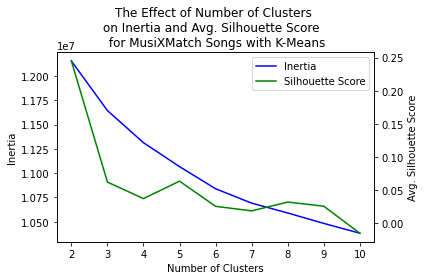

In [71]:
run_kmeans(X_Data, np.arange(2, 11, 1), "MusiXMatch Songs")

- Silhouette score stops decreasing as quickly after 3 clusters